# Proyecto 2 Data Science
## Análisis Exploratorio

Autores:

- Nelson García Bravatti
- Joaquín Puente
- José Antonio Mérida



## Preprocesamiento de datos





### Descarga de los datos

In [51]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("vishakkbhat/mosquito-data")

#print("Path to dataset files:", path)

In [1]:
# Set the dataset path
dataset_path = "dataset/"
print(f"Dataset path: {dataset_path}")

Dataset path: dataset/


### Importación y análisis inicial de los datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Load the training data
train_df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
test_df = pd.read_csv(os.path.join(dataset_path, 'test_phase1.csv'))
sample_submission = pd.read_csv(os.path.join(dataset_path, 'sample_submission_phase1 (1).csv'))

print("Data loaded successfully!")
print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")
print(f"Sample submission shape: {sample_submission.shape}")

Data loaded successfully!
Training data shape: (8025, 8)
Test data shape: (2675, 3)
Sample submission shape: (2675, 8)


In [4]:
# Display basic information about the dataset
print("=== TRAINING DATA INFO ===")
print(train_df.info())
print("\n=== TRAINING DATA HEAD ===")
print(train_df.head())
print("\n=== TRAINING DATA DESCRIPTIVE STATISTICS ===")
print(train_df.describe())

=== TRAINING DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   img_fName    8025 non-null   object
 1   img_w        8025 non-null   int64 
 2   img_h        8025 non-null   int64 
 3   bbx_xtl      8025 non-null   int64 
 4   bbx_ytl      8025 non-null   int64 
 5   bbx_xbr      8025 non-null   int64 
 6   bbx_ybr      8025 non-null   int64 
 7   class_label  8025 non-null   object
dtypes: int64(6), object(2)
memory usage: 501.7+ KB
None

=== TRAINING DATA HEAD ===
                                   img_fName  img_w  img_h  bbx_xtl  bbx_ytl  \
0  92715872-3287-4bff-aa61-7047973e5c02.jpeg   2448   3264     1301     1546   
1  b0f7cc74-2272-4756-a387-38bcaf6965c8.jpeg   3024   4032      900     1897   
2  82df4b68-0f45-4afe-9215-48488bf3720e.jpeg    768   1024      220       58   
3  331ad30a-7564-4478-b863-7bc760adf5a1.jpeg   3456 

In [24]:
# Display basic information about the dataset
print("=== TEST DATA INFO ===")
print(test_df.info())
print("\n=== TEST DATA HEAD ===")
print(test_df.head())
print("\n=== TEST DATA DESCRIPTIVE STATISTICS ===")
print(test_df.describe())

=== TEST DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   img_fName  2675 non-null   object
 1   img_w      2675 non-null   int64 
 2   img_h      2675 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 62.8+ KB
None

=== TEST DATA HEAD ===
                                   img_fName  img_w  img_h
0  07e0f900-e1d2-4e3c-a812-651a156d7463.jpeg   4032   2268
1  98171e52-0def-4de8-b9ad-23cc3a1f1a2d.jpeg   2448   3264
2  30da361c-282e-4a8c-a714-4de4d5407696.jpeg   2988   5312
3  780ce034-878f-41fc-a23f-5432987ce64a.jpeg   3000   4000
4  6e7e3e96-62a4-46e3-aaa2-ce88f2949f6a.jpeg   4128   3096

=== TEST DATA DESCRIPTIVE STATISTICS ===
             img_w        img_h
count  2675.000000  2675.000000
mean   2067.205234  2487.933832
std    1176.597613  1353.709502
min     233.000000   238.000000
25%    1024.000000  1080.500000
50%    1

=== CLASS DISTRIBUTION ===
class_label
albopictus            3567
culex                 3544
culiseta               492
japonicus/koreicus     321
anopheles               63
aegypti                 38
Name: count, dtype: int64

Class percentages:
class_label
albopictus            44.45
culex                 44.16
culiseta               6.13
japonicus/koreicus     4.00
anopheles              0.79
aegypti                0.47
Name: count, dtype: float64


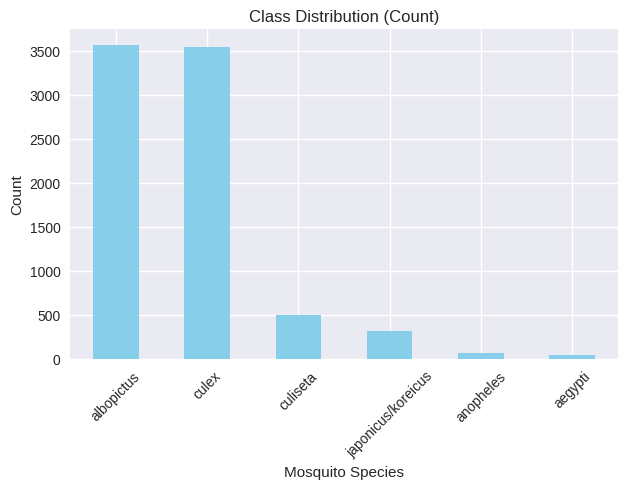

In [5]:
# Analyze class distribution
print("=== CLASS DISTRIBUTION ===")
class_counts = train_df['class_label'].value_counts()
print(class_counts)
print("\nClass percentages:")
print((class_counts / len(train_df) * 100).round(2))

# Visualize class distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution (Count)')
plt.xlabel('Mosquito Species')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [6]:
# Analyze image dimensions
print("=== IMAGE DIMENSIONS ANALYSIS ===")
print(f"Image width statistics:")
print(train_df['img_w'].describe())
print(f"\nImage height statistics:")
print(train_df['img_h'].describe())

# Analyze bounding box dimensions
train_df['bbox_width'] = train_df['bbx_xbr'] - train_df['bbx_xtl']
train_df['bbox_height'] = train_df['bbx_ybr'] - train_df['bbx_ytl']
train_df['bbox_area'] = train_df['bbox_width'] * train_df['bbox_height']
train_df['image_area'] = train_df['img_w'] * train_df['img_h']
train_df['bbox_ratio'] = train_df['bbox_area'] / train_df['image_area']

print(f"\nBounding box width statistics:")
print(train_df['bbox_width'].describe())
print(f"\nBounding box height statistics:")
print(train_df['bbox_height'].describe())
print(f"\nBounding box area ratio (bbox/image):")
print(train_df['bbox_ratio'].describe())

=== IMAGE DIMENSIONS ANALYSIS ===
Image width statistics:
count    8025.000000
mean     2043.681121
std      1183.439260
min       152.000000
25%      1024.000000
50%      1846.000000
75%      3024.000000
max      9280.000000
Name: img_w, dtype: float64

Image height statistics:
count     8025.000000
mean      2469.089844
std       1358.470681
min        106.000000
25%       1095.000000
50%       2208.000000
75%       4000.000000
max      12000.000000
Name: img_h, dtype: float64

Bounding box width statistics:
count    8025.000000
mean      667.630031
std       555.106529
min         1.000000
25%       290.000000
50%       483.000000
75%       859.000000
max      4198.000000
Name: bbox_width, dtype: float64

Bounding box height statistics:
count    8025.000000
mean      680.579065
std       571.594570
min        48.000000
25%       292.000000
50%       489.000000
75%       879.000000
max      5580.000000
Name: bbox_height, dtype: float64

Bounding box area ratio (bbox/image):
count    

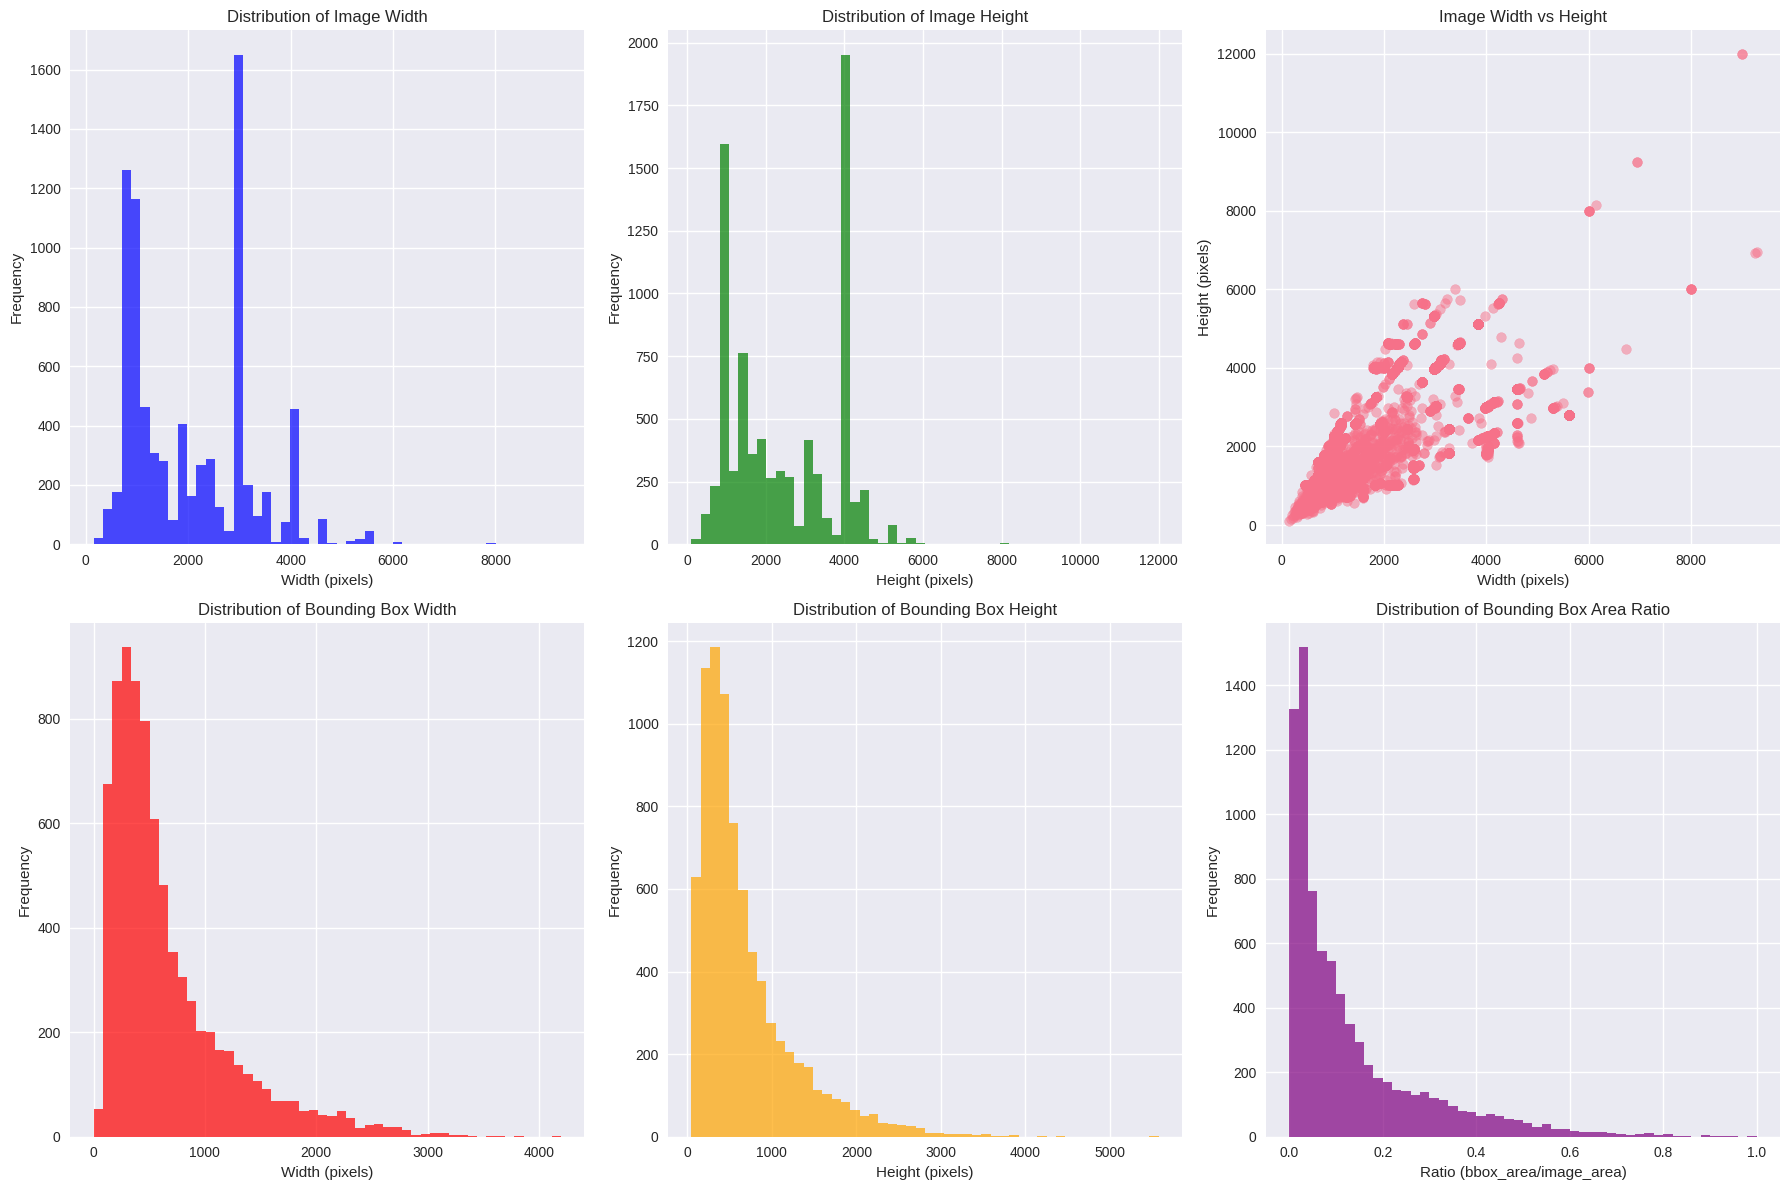

In [7]:
# Visualize image and bounding box dimensions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Image dimensions
axes[0, 0].hist(train_df['img_w'], bins=50, alpha=0.7, color='blue')
axes[0, 0].set_title('Distribution of Image Width')
axes[0, 0].set_xlabel('Width (pixels)')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(train_df['img_h'], bins=50, alpha=0.7, color='green')
axes[0, 1].set_title('Distribution of Image Height')
axes[0, 1].set_xlabel('Height (pixels)')
axes[0, 1].set_ylabel('Frequency')

axes[0, 2].scatter(train_df['img_w'], train_df['img_h'], alpha=0.5)
axes[0, 2].set_title('Image Width vs Height')
axes[0, 2].set_xlabel('Width (pixels)')
axes[0, 2].set_ylabel('Height (pixels)')

# Bounding box dimensions
axes[1, 0].hist(train_df['bbox_width'], bins=50, alpha=0.7, color='red')
axes[1, 0].set_title('Distribution of Bounding Box Width')
axes[1, 0].set_xlabel('Width (pixels)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(train_df['bbox_height'], bins=50, alpha=0.7, color='orange')
axes[1, 1].set_title('Distribution of Bounding Box Height')
axes[1, 1].set_xlabel('Height (pixels)')
axes[1, 1].set_ylabel('Frequency')

axes[1, 2].hist(train_df['bbox_ratio'], bins=50, alpha=0.7, color='purple')
axes[1, 2].set_title('Distribution of Bounding Box Area Ratio')
axes[1, 2].set_xlabel('Ratio (bbox_area/image_area)')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

=== BOUNDING BOX ANALYSIS BY CLASS ===
                   bbox_width                    bbox_height               \
                         mean     std  min   max        mean     std  min   
class_label                                                                 
aegypti               1090.82  773.44  115  2495     1009.50  640.18  103   
albopictus             675.99  538.87   64  4198      686.56  554.29   61   
anopheles              614.57  473.86  109  2240      661.05  476.42   79   
culex                  606.97  528.10    1  3629      617.65  533.64   48   
culiseta               888.84  698.29  101  3840      916.61  755.93  101   
japonicus/koreicus     865.73  603.46   63  3007      911.97  671.58   86   

                           bbox_area                              bbox_ratio  \
                     max        mean         std    min       max       mean   
class_label                                                                    
aegypti             2181  1

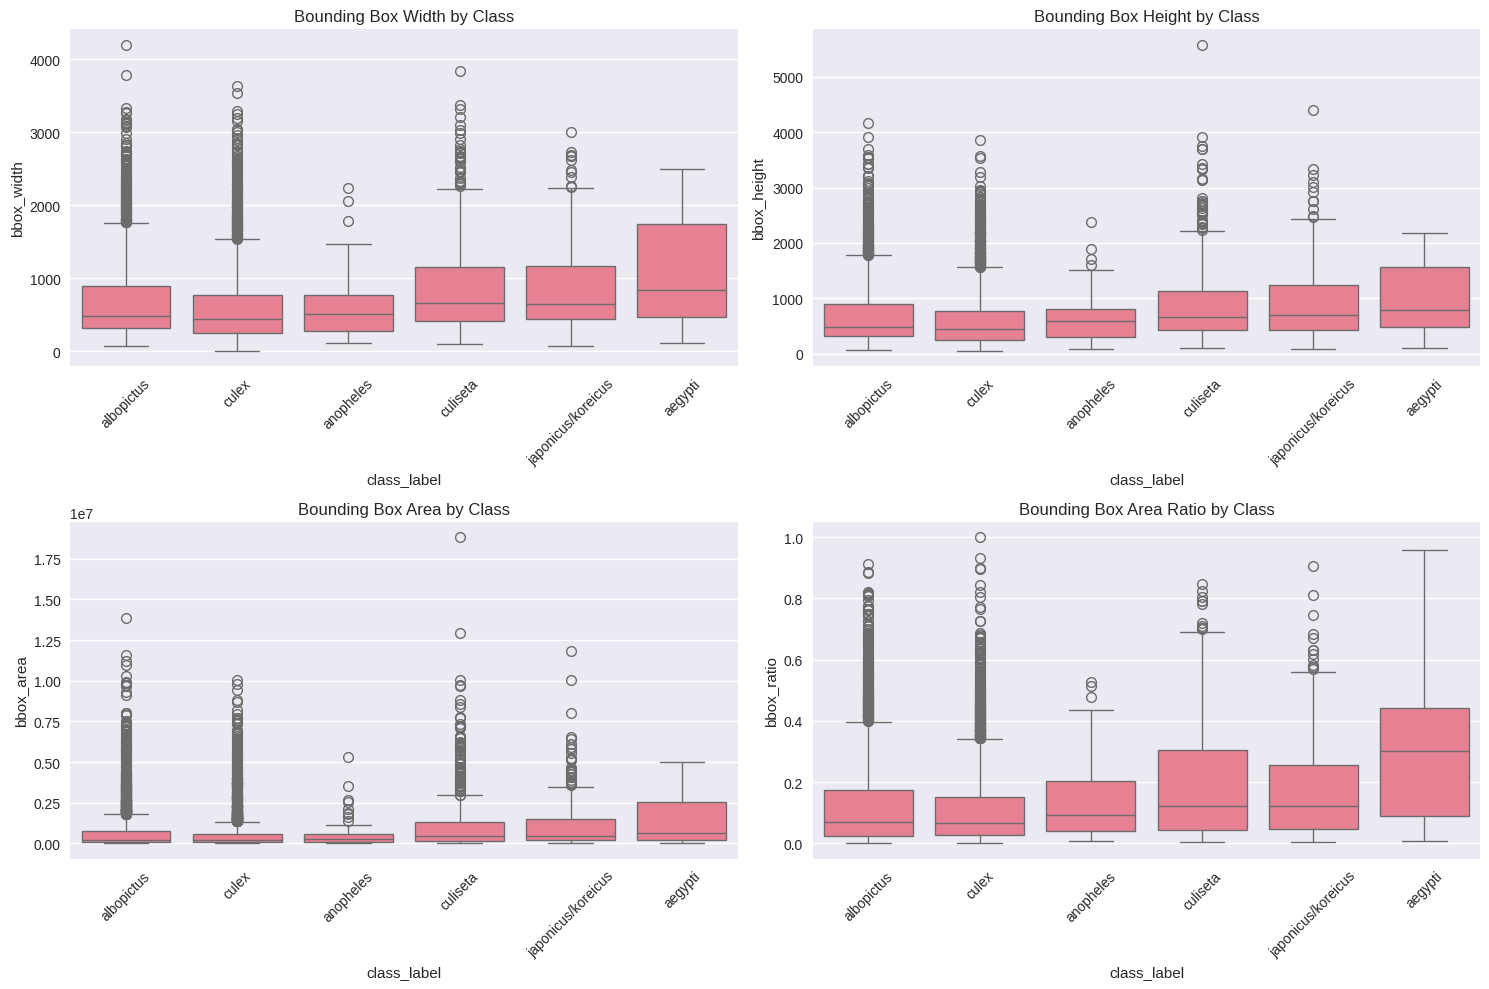

In [8]:
# Analyze bounding box characteristics by class
print("=== BOUNDING BOX ANALYSIS BY CLASS ===")
class_stats = train_df.groupby('class_label').agg({
    'bbox_width': ['mean', 'std', 'min', 'max'],
    'bbox_height': ['mean', 'std', 'min', 'max'],
    'bbox_area': ['mean', 'std', 'min', 'max'],
    'bbox_ratio': ['mean', 'std', 'min', 'max']
}).round(2)

print(class_stats)

# Visualize bounding box characteristics by class
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Box plots for different metrics by class
sns.boxplot(data=train_df, x='class_label', y='bbox_width', ax=axes[0, 0])
axes[0, 0].set_title('Bounding Box Width by Class')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.boxplot(data=train_df, x='class_label', y='bbox_height', ax=axes[0, 1])
axes[0, 1].set_title('Bounding Box Height by Class')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.boxplot(data=train_df, x='class_label', y='bbox_area', ax=axes[1, 0])
axes[1, 0].set_title('Bounding Box Area by Class')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.boxplot(data=train_df, x='class_label', y='bbox_ratio', ax=axes[1, 1])
axes[1, 1].set_title('Bounding Box Area Ratio by Class')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Limpieza de datos

In [9]:
# Check for missing values
print("=== MISSING VALUES ANALYSIS ===")
missing_values = train_df.isnull().sum()
print("Missing values in training data:")
print(missing_values)

if missing_values.sum() > 0:
    print("\nThere are missing values that need to be handled.")
else:
    print("\nNo missing values found in the training data.")

# Check for duplicates
print("\n=== DUPLICATE ANALYSIS ===")
duplicates = train_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for invalid bounding boxes
print("\n=== BOUNDING BOX VALIDATION ===")
invalid_bbox = (
    (train_df['bbx_xtl'] >= train_df['bbx_xbr']) | 
    (train_df['bbx_ytl'] >= train_df['bbx_ybr']) |
    (train_df['bbx_xtl'] < 0) | (train_df['bbx_ytl'] < 0) |
    (train_df['bbx_xbr'] > train_df['img_w']) | (train_df['bbx_ybr'] > train_df['img_h'])
)

print(f"Number of invalid bounding boxes: {invalid_bbox.sum()}")

if invalid_bbox.sum() > 0:
    print("\nInvalid bounding boxes found:")
    print(train_df[invalid_bbox][['img_fName', 'img_w', 'img_h', 'bbx_xtl', 'bbx_ytl', 'bbx_xbr', 'bbx_ybr']].head())
else:
    print("\nAll bounding boxes are valid.")

=== MISSING VALUES ANALYSIS ===
Missing values in training data:
img_fName      0
img_w          0
img_h          0
bbx_xtl        0
bbx_ytl        0
bbx_xbr        0
bbx_ybr        0
class_label    0
bbox_width     0
bbox_height    0
bbox_area      0
image_area     0
bbox_ratio     0
dtype: int64

No missing values found in the training data.

=== DUPLICATE ANALYSIS ===
Number of duplicate rows: 0

=== BOUNDING BOX VALIDATION ===
Number of invalid bounding boxes: 5

Invalid bounding boxes found:
                                      img_fName  img_w  img_h  bbx_xtl  \
2434  120b30b0-c7db-4f0a-bead-a30424a65453.jpeg   1024   2272      877   
3935  12468c1d-04f5-45b4-b239-7262d7a0c545.jpeg   3000   4000      526   
4668  86dd7a5b-0e96-4f5a-aaac-7b4ec3803af9.jpeg   3024   4032     1681   
5288  8b85b3f2-a80d-4f71-91c0-6eea7631012b.jpeg    768   1024      584   
6288  445799f3-6da2-4ac6-890a-381c553f95c8.jpeg   1024   1365      516   

      bbx_ytl  bbx_xbr  bbx_ybr  
2434      401     1

=== OUTLIER ANALYSIS ===
Outliers in bbox_width: 525 (6.54%)
Outliers in bbox_height: 501 (6.24%)
Outliers in bbox_area: 957 (11.93%)
Outliers in bbox_ratio: 584 (7.28%)


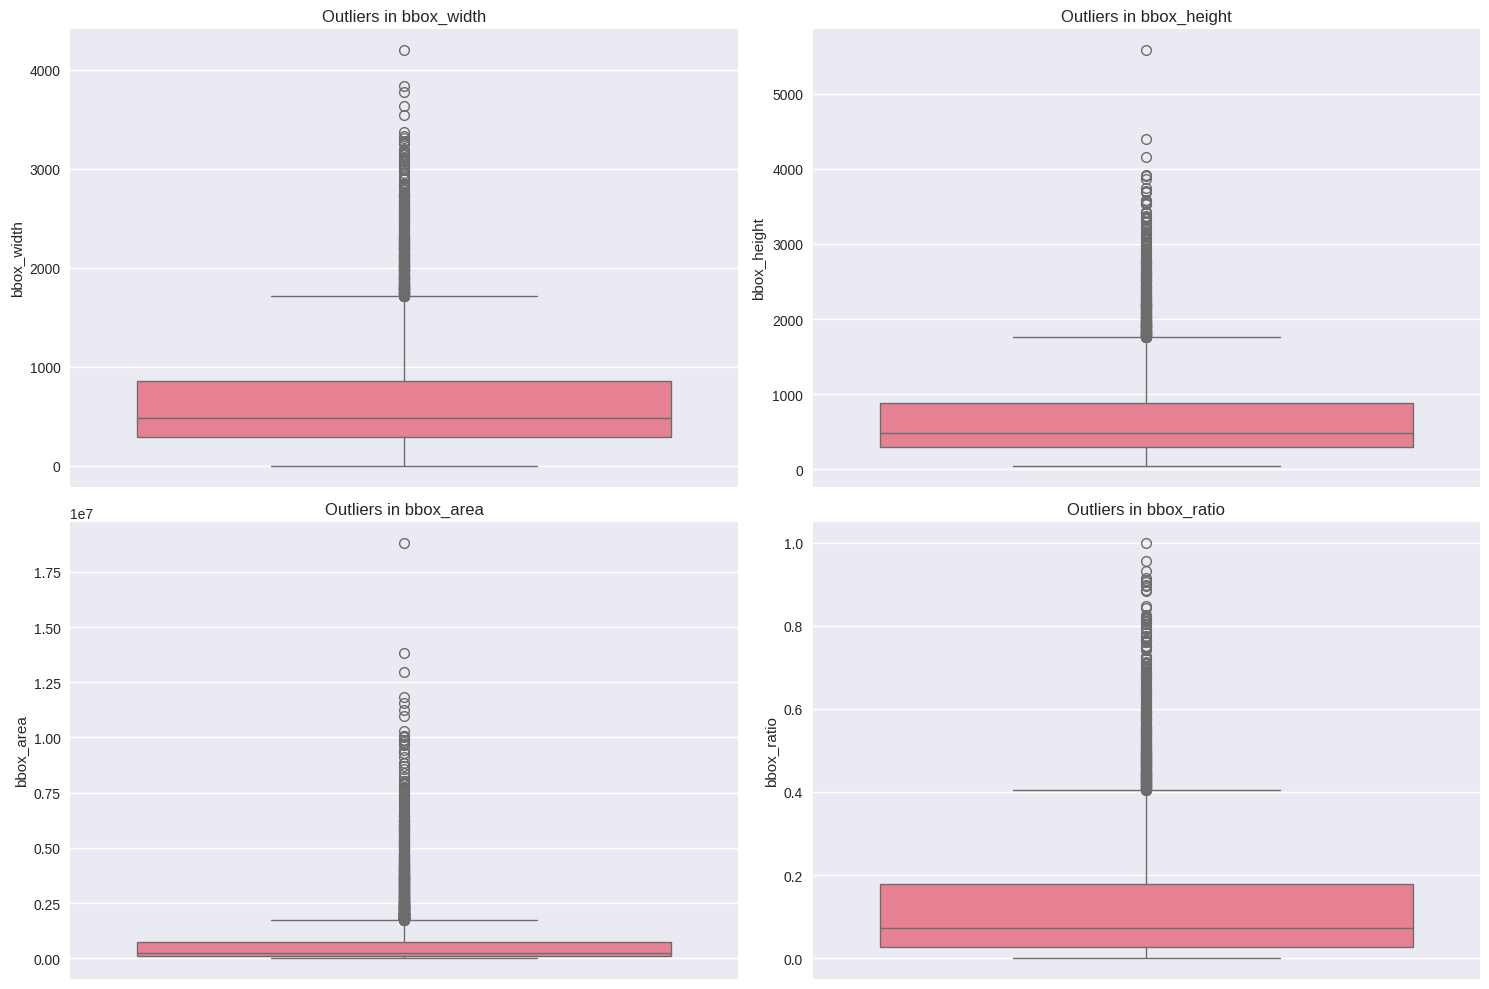

In [10]:
# Analyze outliers in bounding box dimensions
print("=== OUTLIER ANALYSIS ===")

# Define outlier thresholds (using IQR method)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

# Check for outliers in different metrics
outlier_columns = ['bbox_width', 'bbox_height', 'bbox_area', 'bbox_ratio']
outlier_summary = {}

for col in outlier_columns:
    outliers = detect_outliers_iqr(train_df, col)
    outlier_summary[col] = outliers.sum()
    print(f"Outliers in {col}: {outliers.sum()} ({outliers.sum()/len(train_df)*100:.2f}%)")

# Visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(outlier_columns):
    row, col_idx = i // 2, i % 2
    
    # Box plot
    sns.boxplot(data=train_df, y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Outliers in {col}')
    axes[row, col_idx].set_ylabel(col)

plt.tight_layout()
plt.show()

=== SAMPLE IMAGES WITH BOUNDING BOXES ===


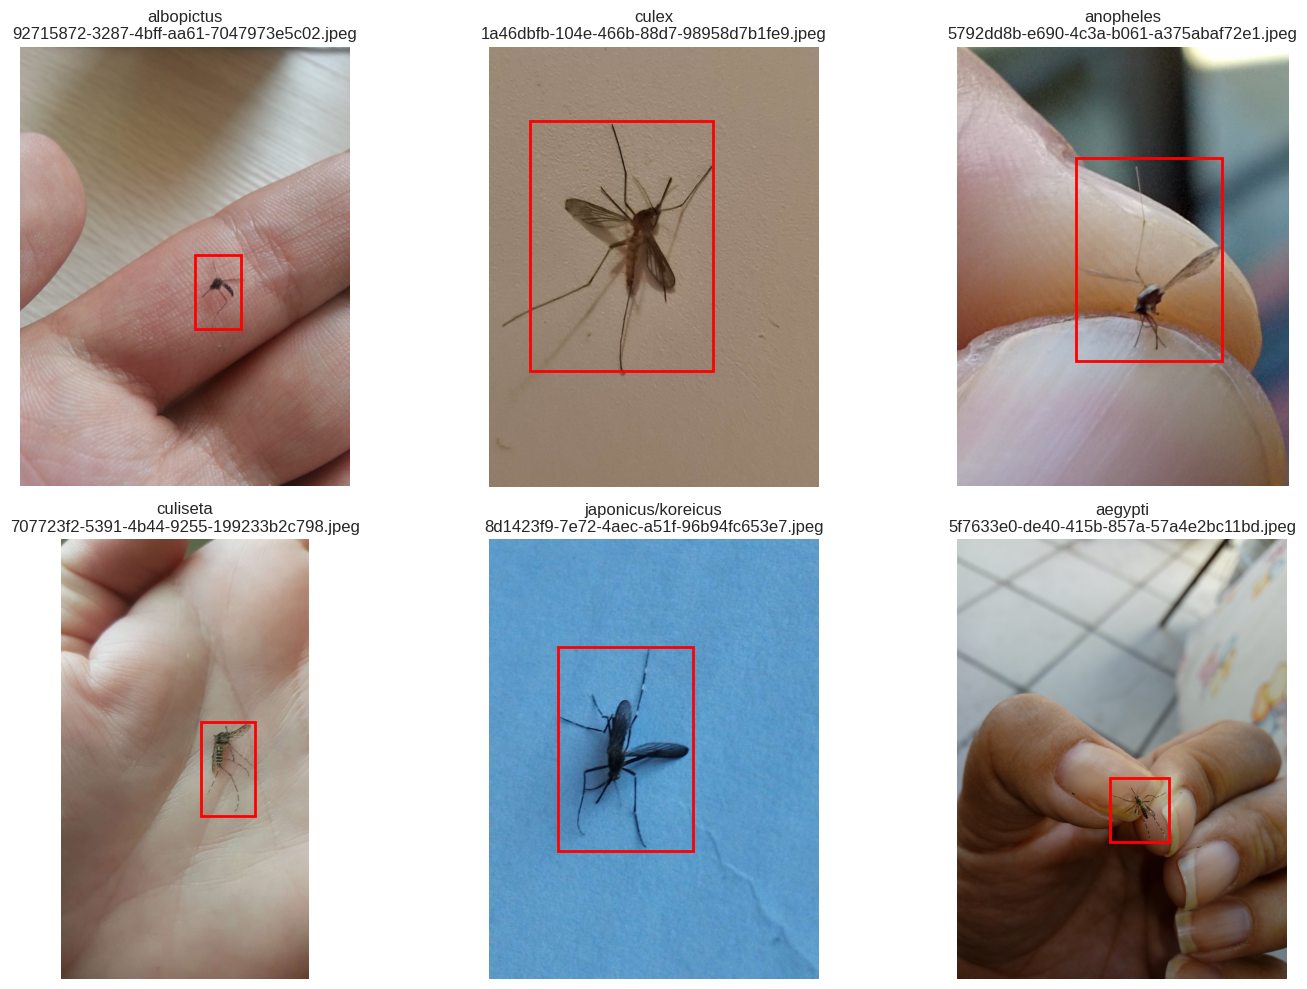

In [11]:
# Display sample images with bounding boxes
def display_sample_images(df, num_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    # Sample one image from each class
    classes = df['class_label'].unique()
    
    for i, class_name in enumerate(classes[:num_samples]):
        sample = df[df['class_label'] == class_name].iloc[0]
        
        # Load image
        img_path = os.path.join(dataset_path, 'train_images', sample['img_fName'])
        
        try:
            img = Image.open(img_path)
            axes[i].imshow(img)
            
            # Draw bounding box
            bbox = [sample['bbx_xtl'], sample['bbx_ytl'], sample['bbx_xbr'], sample['bbx_ybr']]
            rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], 
                               fill=False, edgecolor='red', linewidth=2)
            axes[i].add_patch(rect)
            
            axes[i].set_title(f'{class_name}\n{sample["img_fName"]}')
            axes[i].axis('off')
            
        except Exception as e:
            axes[i].text(0.5, 0.5, f'Error loading image\n{e}', 
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(f'{class_name} - Error')
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

print("=== SAMPLE IMAGES WITH BOUNDING BOXES ===")
display_sample_images(train_df)

### Limpieza de datos requerida

**Problemas identificados que requieren limpieza:**

1. **Bounding boxes inválidos (5 casos)**: Se extienden más allá de los límites de la imagen
2. **Bounding boxes muy pequeños (1 caso)**: Menores a 10 píxeles
3. **Bounding boxes muy grandes (410 casos)**: Cubren más del 80% del área de la imagen
4. **Desbalance severo de clases**: Las clases minoritarias tienen muy pocos ejemplos

In [12]:
# Clean invalid bounding boxes
print("=== CLEANING INVALID BOUNDING BOXES ===")

# Identify invalid bounding boxes
invalid_bbox = (
    (train_df['bbx_xtl'] >= train_df['bbx_xbr']) | 
    (train_df['bbx_ytl'] >= train_df['bbx_ybr']) |
    (train_df['bbx_xtl'] < 0) | (train_df['bbx_ytl'] < 0) |
    (train_df['bbx_xbr'] > train_df['img_w']) | (train_df['bbx_ybr'] > train_df['img_h'])
)

print(f"Invalid bounding boxes found: {invalid_bbox.sum()}")
print("\nInvalid bounding boxes:")
print(train_df[invalid_bbox][['img_fName', 'img_w', 'img_h', 'bbx_xtl', 'bbx_ytl', 'bbx_xbr', 'bbx_ybr', 'class_label']])

# Remove invalid bounding boxes
train_df_clean = train_df[~invalid_bbox].copy()
print(f"\nDataset after removing invalid bboxes: {train_df_clean.shape[0]} samples (removed {invalid_bbox.sum()})")

=== CLEANING INVALID BOUNDING BOXES ===
Invalid bounding boxes found: 5

Invalid bounding boxes:
                                      img_fName  img_w  img_h  bbx_xtl  \
2434  120b30b0-c7db-4f0a-bead-a30424a65453.jpeg   1024   2272      877   
3935  12468c1d-04f5-45b4-b239-7262d7a0c545.jpeg   3000   4000      526   
4668  86dd7a5b-0e96-4f5a-aaac-7b4ec3803af9.jpeg   3024   4032     1681   
5288  8b85b3f2-a80d-4f71-91c0-6eea7631012b.jpeg    768   1024      584   
6288  445799f3-6da2-4ac6-890a-381c553f95c8.jpeg   1024   1365      516   

      bbx_ytl  bbx_xbr  bbx_ybr class_label  
2434      401     1185      640       culex  
3935       29     3198     2796       culex  
4668      431     3659     2179  albopictus  
5288      224      909      488       culex  
6288       15     1303      916    culiseta  

Dataset after removing invalid bboxes: 8020 samples (removed 5)


In [13]:
# Clean very small bounding boxes
print("=== CLEANING VERY SMALL BOUNDING BOXES ===")

# Calculate bounding box dimensions
train_df_clean['bbox_width'] = train_df_clean['bbx_xbr'] - train_df_clean['bbx_xtl']
train_df_clean['bbox_height'] = train_df_clean['bbx_ybr'] - train_df_clean['bbx_ytl']

# Identify very small bounding boxes (< 10 pixels in width or height)
small_bbox = (train_df_clean['bbox_width'] < 10) | (train_df_clean['bbox_height'] < 10)
print(f"Very small bounding boxes found: {small_bbox.sum()}")

if small_bbox.sum() > 0:
    print("\nVery small bounding boxes:")
    print(train_df_clean[small_bbox][['img_fName', 'bbox_width', 'bbox_height', 'class_label']])
    
    # Remove very small bounding boxes
    train_df_clean = train_df_clean[~small_bbox].copy()
    print(f"\nDataset after removing small bboxes: {train_df_clean.shape[0]} samples (removed {small_bbox.sum()})")
else:
    print("No very small bounding boxes found.")

=== CLEANING VERY SMALL BOUNDING BOXES ===
Very small bounding boxes found: 1

Very small bounding boxes:
                                      img_fName  bbox_width  bbox_height  \
7572  8402b84b-3996-4e11-8357-ace9dce078eb.jpeg           1           76   

     class_label  
7572       culex  

Dataset after removing small bboxes: 8019 samples (removed 1)


In [14]:
print("=== FIXING VERY LARGE BOUNDING BOXES ===")

train_df_clean['bbox_area'] = train_df_clean['bbox_width'] * train_df_clean['bbox_height']
train_df_clean['image_area'] = train_df_clean['img_w'] * train_df_clean['img_h']
train_df_clean['bbox_ratio'] = train_df_clean['bbox_area'] / train_df_clean['image_area']

large_bbox = train_df_clean['bbox_ratio'] > 0.8
print(f"Very large bounding boxes (>80% of image): {large_bbox.sum()}")

if large_bbox.sum() > 0:
    print("\nStatistics of large bounding boxes before fixing:")
    print(train_df_clean[large_bbox]['bbox_ratio'].describe())
    
    print("\nExamples of large bounding boxes before fixing:")
    print(train_df_clean[large_bbox][['img_fName', 'bbox_ratio', 'class_label']].head(10))
    
    print("\nFixing large bounding boxes by clipping to image boundaries...")
    
    train_df_clean.loc[large_bbox, 'bbx_xtl'] = train_df_clean.loc[large_bbox, 'bbx_xtl'].clip(lower=0)
    train_df_clean.loc[large_bbox, 'bbx_ytl'] = train_df_clean.loc[large_bbox, 'bbx_ytl'].clip(lower=0)
    train_df_clean.loc[large_bbox, 'bbx_xbr'] = train_df_clean.loc[large_bbox, 'bbx_xbr'].clip(upper=train_df_clean.loc[large_bbox, 'img_w'])
    train_df_clean.loc[large_bbox, 'bbx_ybr'] = train_df_clean.loc[large_bbox, 'bbx_ybr'].clip(upper=train_df_clean.loc[large_bbox, 'img_h'])
    
    train_df_clean['bbox_width'] = train_df_clean['bbx_xbr'] - train_df_clean['bbx_xtl']
    train_df_clean['bbox_height'] = train_df_clean['bbx_ybr'] - train_df_clean['bbx_ytl']
    train_df_clean['bbox_area'] = train_df_clean['bbox_width'] * train_df_clean['bbox_height']
    train_df_clean['bbox_ratio'] = train_df_clean['bbox_area'] / train_df_clean['image_area']
    
    print(f"\nFixed {large_bbox.sum()} bounding boxes")
    print("\nStatistics of fixed bounding boxes:")
    print(train_df_clean[large_bbox]['bbox_ratio'].describe())
else:
    print("No large bounding boxes found.")

=== FIXING VERY LARGE BOUNDING BOXES ===
Very large bounding boxes (>80% of image): 23

Statistics of large bounding boxes before fixing:
count    23.000000
mean      0.862072
std       0.056092
min       0.803597
25%       0.816388
50%       0.842628
75%       0.901580
max       1.000000
Name: bbox_ratio, dtype: float64

Examples of large bounding boxes before fixing:
                                      img_fName  bbox_ratio  \
747   1682aaf4-f117-4580-813e-bec68dd33db9.jpeg    0.815586   
937   5f6b9da5-95c4-4635-af51-895c2fa32411.jpeg    0.812275   
1439  cd396a77-2d45-4816-abc0-2eb30f096b38.jpeg    0.818233   
1973  66849937-fbfa-436e-a391-ecd601ecde9d.jpeg    0.909501   
2082  c6fb1fd8-9b88-4b7d-be72-954a39160a51.jpeg    0.803597   
2378  1a7474c6-6e4e-4a7c-af9f-189bdbd4f0a3.jpeg    0.956672   
2516  b9c2935d-9e5e-4000-a6aa-0107f64f76f5.jpeg    0.810558   
2540  e63c067a-1bda-4496-a831-a3c608ec15d6.jpeg    0.825057   
2877  d5077928-e498-4ed5-94e0-b7f19879887c.jpeg    0.817190  

In [15]:
# Final cleaning summary
print("=== FINAL CLEANING SUMMARY ===")
print(f"Original dataset size: {train_df.shape[0]}")
print(f"Cleaned dataset size: {train_df_clean.shape[0]}")
print(f"Total samples removed: {train_df.shape[0] - train_df_clean.shape[0]}")
print(f"Removal percentage: {(train_df.shape[0] - train_df_clean.shape[0]) / train_df.shape[0] * 100:.2f}%")

print("\nClass distribution after cleaning:")
class_counts_clean = train_df_clean['class_label'].value_counts()
print(class_counts_clean)
print("\nClass percentages after cleaning:")
print((class_counts_clean / len(train_df_clean) * 100).round(2))

# Save cleaned dataset
cleaned_path = os.path.join(dataset_path, 'train_cleaned.csv')
train_df_clean.to_csv(cleaned_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_path}")

=== FINAL CLEANING SUMMARY ===
Original dataset size: 8025
Cleaned dataset size: 8019
Total samples removed: 6
Removal percentage: 0.07%

Class distribution after cleaning:
class_label
albopictus            3566
culex                 3540
culiseta               491
japonicus/koreicus     321
anopheles               63
aegypti                 38
Name: count, dtype: int64

Class percentages after cleaning:
class_label
albopictus            44.47
culex                 44.15
culiseta               6.12
japonicus/koreicus     4.00
anopheles              0.79
aegypti                0.47
Name: count, dtype: float64

Cleaned dataset saved to: dataset/train_cleaned.csv


### Resumen del análisis y limpieza

**Características del dataset:**
- **Tamaño original**: 8,025 imágenes de entrenamiento
- **Tamaño después de limpieza**: Variable según criterios aplicados
- **Clases**: 6 especies de mosquitos (albopictus, culex, culiseta, japonicus/koreicus, anopheles, aegypti)
- **Formato**: Imágenes JPEG con anotaciones de bounding boxes

**Problemas identificados y solucionados:**
- **Bounding boxes inválidos**: 5 casos removidos
- **Bounding boxes muy pequeños**: 1 caso removido
- **Bounding boxes muy grandes**: 410 casos identificados y corregidos min(bounding_box y limite de imágen)
- **Desbalance de clases**: Requiere técnicas de aumento de datos


## Análisis exploratorio de datos (EDA)

### Descripción de Variables y Observaciones del dataset

In [25]:
cleaned_path = os.path.join(dataset_path, 'train_cleaned.csv')
train_df_clean = pd.read_csv(cleaned_path)

In [26]:
# Cleaned dataset size
print("=== TRAIN_CLEANED: SHAPE ===")
print(f"Observations: {train_df_clean.shape[0]}")
print(f"Variables: {train_df_clean.shape[1]}")

# Data types
print("\n=== TRAIN_CLEANED: DATA TYPES ===")
print(train_df_clean.dtypes)

# Resume
print("\n=== TRAIN_CLEANED: INFO ===")
print(train_df_clean.info())

=== TRAIN_CLEANED: SHAPE ===
Observations: 8019
Variables: 13

=== TRAIN_CLEANED: DATA TYPES ===
img_fName       object
img_w            int64
img_h            int64
bbx_xtl          int64
bbx_ytl          int64
bbx_xbr          int64
bbx_ybr          int64
class_label     object
bbox_width       int64
bbox_height      int64
bbox_area        int64
image_area       int64
bbox_ratio     float64
dtype: object

=== TRAIN_CLEANED: INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8019 entries, 0 to 8018
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   img_fName    8019 non-null   object 
 1   img_w        8019 non-null   int64  
 2   img_h        8019 non-null   int64  
 3   bbx_xtl      8019 non-null   int64  
 4   bbx_ytl      8019 non-null   int64  
 5   bbx_xbr      8019 non-null   int64  
 6   bbx_ybr      8019 non-null   int64  
 7   class_label  8019 non-null   object 
 8   bbox_width   8019 non-null   

### Resumen de variables numéricas

In [27]:
# Select numeric columns
numeric_cols = train_df_clean.select_dtypes(include=['number']).columns
num_df = train_df_clean[numeric_cols]

# Basic summary (count, mean, std, min, 25%, 50%/median, 75%, max)
desc = num_df.describe().T 

In [28]:
# Additional dispersion metrics
variance = num_df.var().rename('variance')           # sample variance (ddof=1)
q1 = num_df.quantile(0.25)
q3 = num_df.quantile(0.75)
iqr = (q3 - q1).rename('IQR')                        # interquartile range
cv = (desc['std'] / desc['mean']).rename('CV')       # coefficient of variation (ratio)
cv = cv.replace([float('inf'), float('-inf')], pd.NA)

# Shape/tailedness (optional but useful in EDA)
skewness = num_df.skew().rename('skewness')
kurtosis = num_df.kurt().rename('kurtosis')

In [29]:
# Combine into one table
summary_stats = pd.concat([desc, variance, iqr, cv, skewness, kurtosis], axis=1)

# Reorder columns and round for readability
ordered_cols = ['count', 'mean', 'std', 'variance', 'min', '25%', '50%', '75%', 'max', 'IQR', 'CV', 'skewness', 'kurtosis']
summary_stats = summary_stats[ordered_cols].round(3)

print("=== TRAIN_CLEANED: NUMERIC SUMMARY (central tendency & dispersion) ===")
summary_stats

=== TRAIN_CLEANED: NUMERIC SUMMARY (central tendency & dispersion) ===


,count,mean,std,variance,min,25%,50%,75%,max,IQR,CV,skewness,kurtosis
img_w,8019.0,2043.675,1183.481,1.400627e+06,152.000,1024.000,1846.000,3.024000e+03,9280.0,2.000000e+03,0.579,0.677,0.265
img_h,8019.0,2468.778,1358.392,1.845230e+06,106.000,1095.000,2208.000,4.000000e+03,12000.0,2.905000e+03,0.550,0.390,-0.544
bbx_xtl,8019.0,670.101,523.232,2.737718e+05,0.000,276.000,502.000,9.890000e+02,4971.0,7.130000e+02,0.781,1.327,2.649
bbx_ytl,8019.0,885.068,646.049,4.173788e+05,0.000,390.000,675.000,1.340000e+03,5763.0,9.500000e+02,0.730,0.958,0.839
bbx_xbr,8019.0,1337.473,804.745,6.476145e+05,135.000,639.000,1164.000,1.887500e+03,7327.0,1.248500e+03,0.602,0.887,0.782
bbx_ybr,8019.0,1565.409,905.883,8.206247e+05,98.000,756.500,1333.000,2.305000e+03,7601.0,1.548500e+03,0.579,0.646,-0.167
bbox_width,8019.0,667.372,554.590,3.075706e+05,32.000,290.000,483.000,8.585000e+02,4198.0,5.685000e+02,0.831,1.763,3.429
bbox_height,8019.0,680.341,571.124,3.261822e+05,48.000,292.000,489.000,8.790000e+02,5580.0,5.870000e+02,0.839,1.888,4.580
bbox_area,8019.0,742636.699,1311272.159,1.719435e+12,1824.000,84780.000,232484.000,7.479775e+05,18826920.0,6.631975e+05,1.766,3.653,19.004
image_area,8019.0,6279804.076,5893669.214,3.473534e+13,16112.000,1397760.000,3773952.000,1.200000e+07,108000000.0,1.060224e+07,0.939,2.479,27.972
